In [ ]:
pip install pandas numpy matplotlib seaborn plotly


^C


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 567.9 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.0 MB 567.9 kB/s eta 0:00:19
   -- ------------------------------------- 0.8/11.0 MB 637.1 kB/s eta 0:00:17
   --- ------------------------------------ 1.0/11.0 MB 689.0 kB/s eta 0:00:15
   --- ------------------------------------ 1.0/11.0 MB 689.0 kB/s eta 0:00:15
   ----- ---------------------------------- 1.6/11.0 MB 771.0 kB/s eta 0:00:13
   ------ --------------------------------- 1.8/11.0 MB 825.2 kB/s eta 0:00:12
   ------- -------------------------------- 2.1/11.0 MB 871.0 kB/s eta 0:00:11
   -------- ------------------------------- 2.4/11.0 MB 915.2 kB/s eta 0:00:10
   --------- ------------------------------ 2.6/11.0 MB 926.0 kB/s eta 0:00:10


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('uber.csv')

In [2]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

(200000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
         Unnamed: 0    fare_amount  pickup_longitude  pickup_latitude  \
count  2.000000e+05  200000.000000     200000.000000    200000.000000   
mean   2.771250e+07      11.359955        -72.527638        39.935885   
std    1.601382e+07       9.901776         11.437787

In [3]:
print(df.isnull().sum())
df = df.dropna()  
df = df[df['fare_amount'] > 0]  


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [4]:
df.to_csv('uber_fares_cleaned.csv', index=False)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [6]:
print(df['fare_amount'].mean())
print(df['fare_amount'].median())
print(df['fare_amount'].mode()[0])
print(df['fare_amount'].std())
print(df['fare_amount'].quantile([0.25, 0.5, 0.75]))
print(df['fare_amount'].max() - df['fare_amount'].min())


11.362585797366696
8.5
6.5
9.89706299990779
0.25     6.0
0.50     8.5
0.75    12.5
Name: fare_amount, dtype: float64
498.99


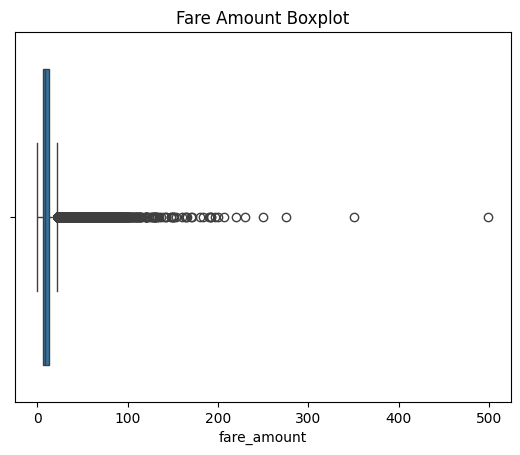

In [7]:
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount Boxplot")
plt.show()

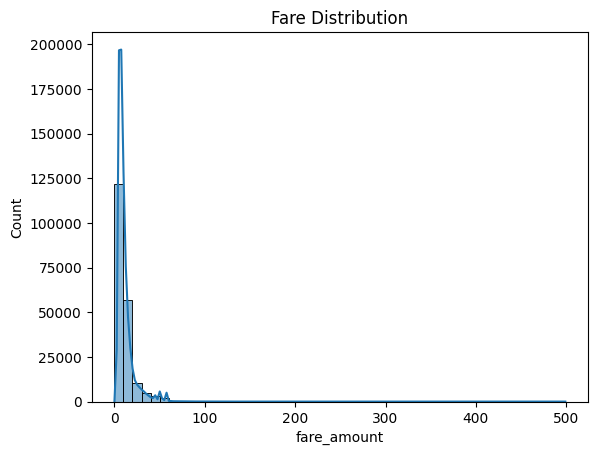

In [8]:
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title("Fare Distribution")
plt.show()


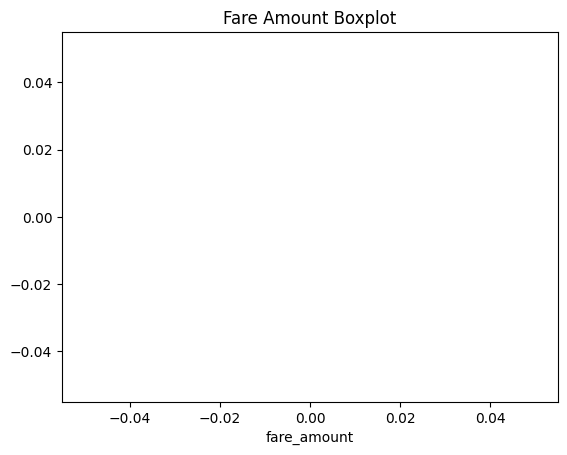

In [14]:
sns.scatterplot(x=df['fare_amount'])
plt.title("Fare Amount Boxplot")
plt.show()

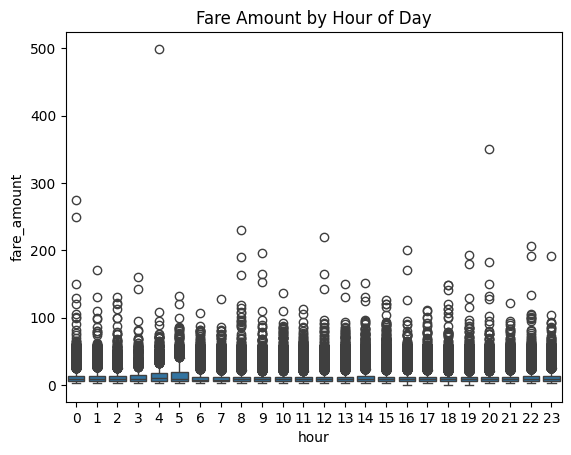

In [16]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
sns.boxplot(x='hour', y='fare_amount', data=df)
plt.title("Fare Amount by Hour of Day")
plt.show()

In [17]:
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['is_peak'] = df['hour'].apply(lambda x: 1 if 7 <= x <= 9 or 17 <= x <= 19 else 0)

In [18]:
df = pd.get_dummies(df, columns=['weekday'], drop_first=True)

In [19]:
df.to_csv('uber_fares_enhanced.csv', index=False)

In [20]:
df.to_csv("uber_fares_cleaned.csv", index=False)


In [21]:
new_df = pd.read_csv("uber_fares_cleaned.csv")
print(new_df.head())


   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

             pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1  2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2  2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3  2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4  2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.999512         40.723217                1    19    7      5   
1         -73.994710         40.750325                1    20   17      7   

In [22]:
from math import radians, cos, sin, asin, sqrt


In [23]:
def haversine(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Haversine formula
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    # Radius of Earth in km (6371 km)
    distance = 6371 * c
    return distance


In [24]:
df['trip_distance_km'] = df.apply(lambda row: haversine(
    row['pickup_latitude'], row['pickup_longitude'],
    row['dropoff_latitude'], row['dropoff_longitude']
), axis=1)


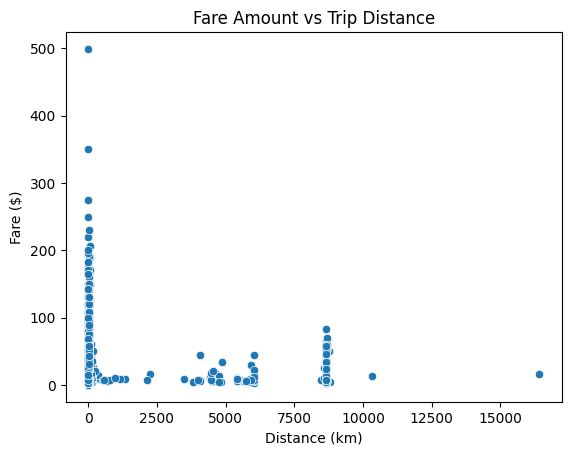

In [28]:
sns.scatterplot(x=df['trip_distance_km'], y=df['fare_amount'])
plt.title("Fare Amount vs Trip Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Fare ($)")
plt.show()


In [32]:
print(df.columns)



Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'is_peak', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'trip_distance_km'],
      dtype='object')


In [33]:
weekday_columns = [
    'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday',
    'weekday_Thursday', 'weekday_Saturday', 'weekday_Sunday'
]

weekday_counts = df[weekday_columns].sum().sort_values(ascending=False)

print(weekday_counts)


weekday_Saturday     30250
weekday_Thursday     30018
weekday_Wednesday    29034
weekday_Tuesday      28120
weekday_Sunday       26439
weekday_Monday       25242
dtype: int64


In [34]:
new_df = pd.read_csv("uber_fares_cleaned.csv")
print(new_df.head())


   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

             pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1  2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2  2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3  2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4  2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.999512         40.723217                1    19    7      5   
1         -73.994710         40.750325                1    20   17      7   